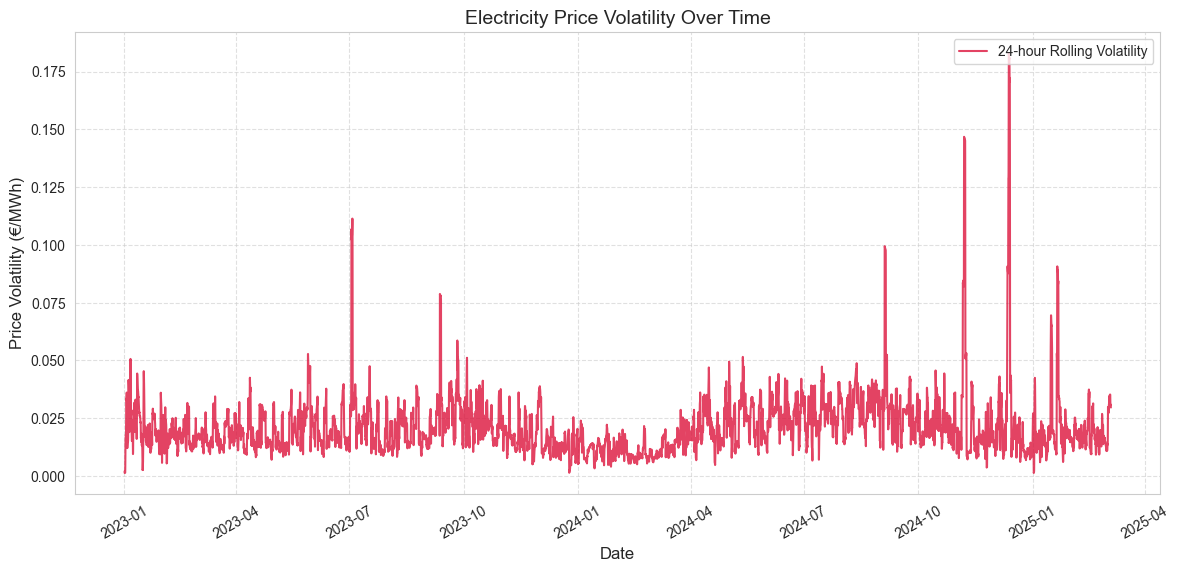

✅ Price volatility plot saved as 'price_volatility_trends.png'.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# =========================
# 📌 Define Paths
# =========================
BASE_DIR = os.getcwd()
PLOTS_DIR = os.path.join(BASE_DIR, "..", "visualizations")
os.makedirs(PLOTS_DIR, exist_ok=True)  # Ensure directory exists

# =========================
# 📌 Load Dataset
# =========================
file_path = "../data/transformed/transformed_refined_Day-ahead_prices_202301010000_202503050000_Hour.csv"
df = pd.read_csv(file_path, delimiter=",")

# Convert time column to datetime
df["Start date"] = pd.to_datetime(df["Start date"], errors="coerce")

# Ensure numeric price column
price_col = "Germany/Luxembourg [€/MWh] Original resolutions"
df[price_col] = pd.to_numeric(df[price_col], errors="coerce")

# =========================
# 📌 Compute Rolling Standard Deviation (Volatility)
# =========================
df["Price Volatility"] = df[price_col].rolling(window=24, min_periods=1).std()

# =========================
# 📌 Plot Volatility Trends
# =========================
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")  # Apply better grid style

plt.plot(df["Start date"], df["Price Volatility"], 
         label="24-hour Rolling Volatility", 
         color="crimson", linewidth=1.5, alpha=0.8)

# =========================
# 📌 Labels, Title & Formatting
# =========================
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price Volatility (€/MWh)", fontsize=12)
plt.title("Electricity Price Volatility Over Time", fontsize=14)
plt.legend(loc="upper right", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(rotation=30)

# =========================
# 📌 Save & Show Plot
# =========================
plot_filename = "price_volatility_trends.png"
plt.savefig(os.path.join(PLOTS_DIR, plot_filename), dpi=300, bbox_inches="tight")
plt.show()
plt.close()

print(f"✅ Price volatility plot saved as '{plot_filename}'.")
